In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from matplotlib.pyplot import figure
from mnist import MNIST

mndata = MNIST('./data/')
X_train, labels_train = map(np.array, mndata.load_training()) 
X_test, labels_test = map(np.array, mndata.load_testing()) 
X_train = X_train/255.0
X_test = X_test/255.0

In [32]:
# a
mu = X_train.mean(axis=0)
sigma = X_train - mu
sigma = np.matmul(sigma.T, sigma)/len(X_train)

U, s, Vt = np.linalg.svd(sigma)
print('lambda 1: ', s[0])
print('lambda 2: ', s[1])
print('lambda 10: ', s[9])
print('lambda 30: ', s[29])
print('lambda 50: ', s[49])
print('sigma sum: ', s.sum())

lambda 1:  5.116787728342082
lambda 2:  3.7413284788648036
lambda 10:  1.2427293764173322
lambda 30:  0.3642557202788898
lambda 50:  0.16970842700672745
sigma sum:  52.72503549512685


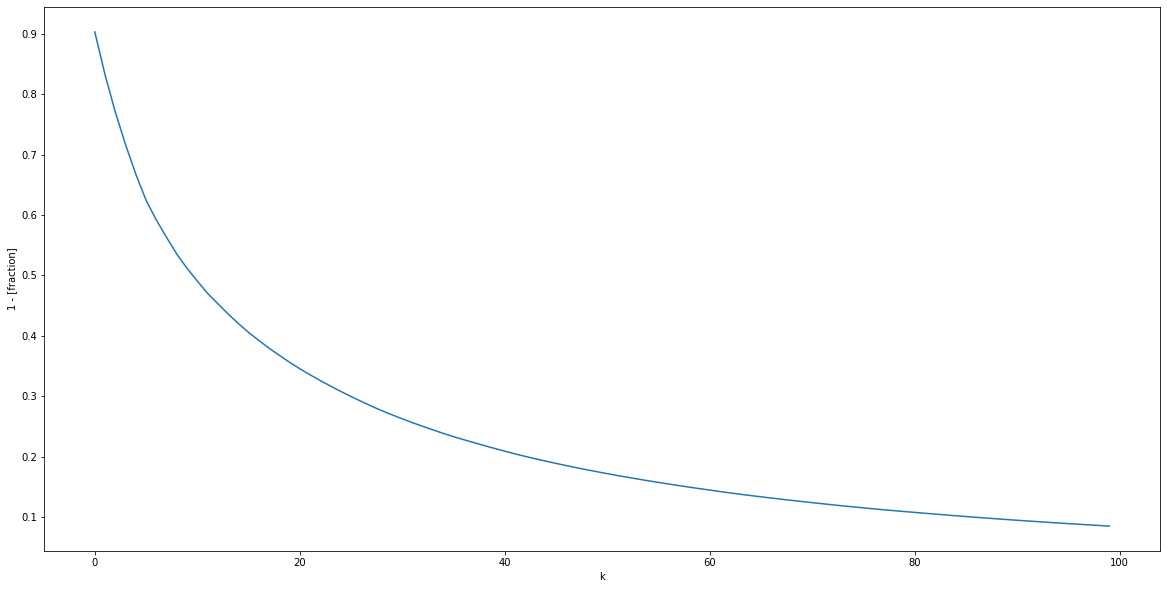

In [81]:
# c
d = 784
plot = []
for k in range(1, 101):
    k_sum = s[0:k].sum()
    d_sum = s[0:d].sum()
    plot.append(1 - (k_sum/d_sum))
plt.figure(figsize=(20, 10))
plt.xlabel('k')
plt.ylabel('1 - [fraction]')
plt.plot(plot)

In [87]:
# reconstruction error
K = 101
reconstruction_error_train = np.zeros(K)
reconstruction_error_test = np.zeros(K)
for k in range(1, K):
    projected = Vt.T[:,:k]
    X_train_reconstructed = np.matmul(np.matmul(X_train - mu, projected), projected.T) + mu
    X_test_reconstructed = np.matmul(np.matmul(X_test - mu, projected), projected.T) + mu
    reconstruction_error_train[k] = np.sum((X_train - X_train_reconstructed) ** 2, axis=1).mean()
    reconstruction_error_test[k] = np.sum((X_test - X_test_reconstructed) ** 2, axis=1).mean()
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


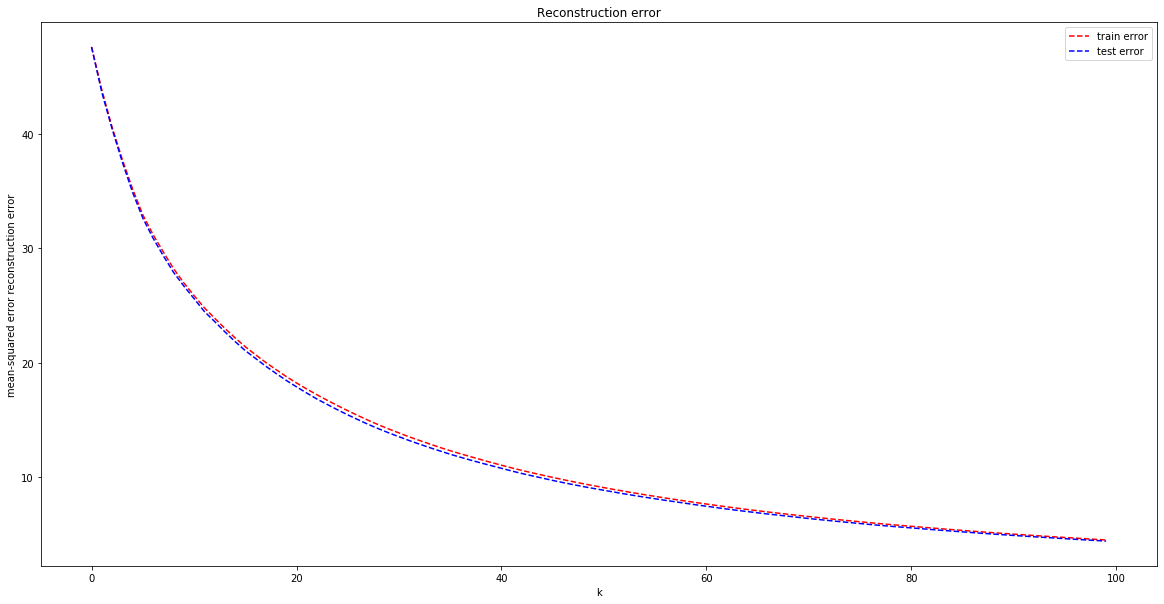

In [90]:
plt.figure(figsize=(20, 10))
plt.plot(reconstruction_error_train[1::], 'r--', label='train error')
plt.plot(reconstruction_error_test[1::], 'b--', label='test error')
plt.title('Reconstruction error')
plt.xlabel('k')
plt.ylabel('mean-squared error reconstruction error')
plt.legend()

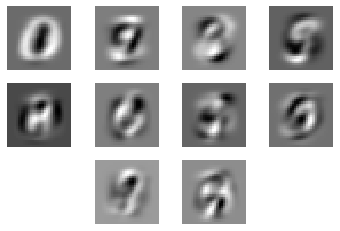

In [36]:
for i in range(10):
    plt.subplot(3, 4, i+2 if i >= 8 else i+1)
    plt.imshow(Vt[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

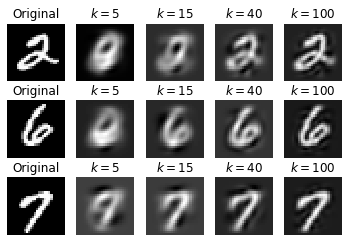

In [72]:
K = [5, 15, 40, 100]
D = [2, 6, 7]
for b,d in enumerate(D):
    i = np.where(labels_train == d)[0][0]
    plt.subplot(3, 5, b*5+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    for a,k in enumerate(K):
        projected = Vt.T[:,:k]
        x_reconstructed = projected.dot(projected.T.dot(X_train[i] - mu)) + mu
        plt.subplot(3, 5, b*5+2+a)
        plt.title('$k = {}$'.format(k))
        plt.imshow(x_reconstructed.reshape(28, 28), cmap='gray')
        plt.axis('off')
